<a href="https://colab.research.google.com/github/dev-bhaveshye/Machine-Learning/blob/main/Principle_Component_Analysis_(Feature_Reduction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

print('Data source import complete.')


**PCA for Feature Reduction**

**Why Use PCA?**
Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving as much variance as possible.

**Reducing the number of features helps:**
Improve model efficiency.
Reduce computational cost.
Minimize noise and redundancy in the dataset.

**Steps for Applying PCA**

**Standardization:** Since PCA is sensitive to feature scale, we first normalize the data using StandardScaler to ensure all features have a mean of 0 and a standard deviation of 1.

**Compute Principal Components:** PCA finds new orthogonal axes (principal components) that capture maximum variance in the data.

**Dimensionality Reduction:** We select the top N components that explain the most variance, reducing the feature space while retaining key information.

**Transform the Data:** The dataset is projected onto these components, creating a lower-dimensional representation.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [ ]:
df.shape

(42000, 785)

In [ ]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38379,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


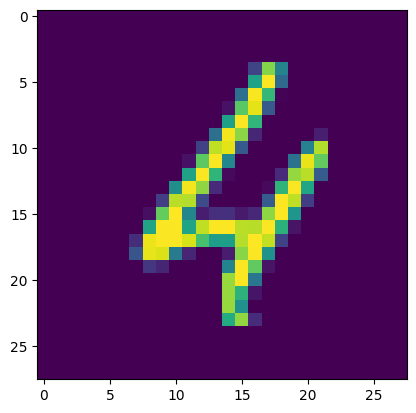

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[15056,1:].values.reshape(28,28))

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(33600, 784)

In [ ]:
x_test.shape

(8400, 784)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [ ]:
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)


In [ ]:
x_train_trf.shape

(33600, 100)

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)*100

95.32142857142857

In [ ]:
for i in range (1,785):
    pca = PCA(n_components=i)

    x_train_trf=pca.fit_transform(x_train)
    x_test_trf=pca.transform(x_test)

    knn=KNeighborsClassifier()
    knn.fit(x_train_trf,y_train)

    y_pred=knn.predict(x_test_trf)

    print(accuracy_score(y_test,y_pred)*100)


26.05952380952381
32.416666666666664
51.01190476190476
66.64285714285715
73.80952380952381
82.26190476190476
84.28571428571429
87.13095238095238
88.61904761904762
90.5952380952381
91.19047619047619
91.79761904761905
92.78571428571428
93.5
93.92857142857143
93.80952380952381
94.10714285714286
94.0952380952381
94.25
94.45238095238095
94.27380952380953
94.36904761904762
94.46428571428571
94.44047619047619
94.85714285714286
94.72619047619048
94.83333333333334
94.76190476190476
94.86904761904762
94.9047619047619
94.91666666666667
95.03571428571429
95.02380952380952
95.04761904761905
95.07142857142857
95.26190476190476
95.26190476190476
95.27380952380953
95.34523809523809
95.27380952380953
95.25
95.26190476190476
95.27380952380953
95.4047619047619
95.33333333333334
95.36904761904762
95.44047619047619
95.44047619047619
95.4047619047619
95.36904761904762
95.35714285714286
95.38095238095238
95.32142857142857
95.38095238095238
95.47619047619048
95.41666666666667
95.44047619047619
95.369047619047